In [1]:
from image_processors import *

/home/fyp/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Namespace(model='encnet', backbone='clip_vitl16_384', dataset='fss', workers=16, base_size=520, crop_size=480, train_split='train', aux=False, se_loss=False, se_weight=0.2, batch_size=16, test_batch_size=16, no_cuda=False, seed=1, weights='/home/fyp/lang-seg/checkpoints/demo_e200.ckpt', eval=False, acc_bn=False, test_val=False, no_val=False, module='clipseg_DPT_test_v2', scale_inv=False, widehead=True, widehead_hr=False, ignore_index=255, jobname='default', strict=True, use_pretrained='True', arch_option=0, nshot=0, fold=0, nworker=0, bsz=1, benchmark='pascal', datapath='data/Datasets_HSN', activation='relu', cuda=True)
Loading model...


/home/fyp/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/migration/migration.py:208: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
Lightning automatically upgraded your loaded checkpoint from v1.3.5 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint checkpoints/demo_e200.ckpt`
/home/fyp/lang-seg/modules/lsegmentation_module_zs.py:50: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = amp.GradScaler(enabled=self.enabled)

:=========== Few-shot Seg. with HSNet ===========
|             datapath: data/Datasets_HSN       
|       

use norm: [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]
['ac_wall', 'acorn', 'adhensive_tape', 'adidas_logo1', 'adidas_logo2', 'afghan_hound', 'african_elephant', 'african_grey', 'agama', 'air_strip', 'aircraft_carrier', 'airedale', 'airship', 'almond', 'ambulance', 'american_staffordshire', 'anemone_fish', 'angora', 'apple', 'armour', 'ashtray', 'assult_rifle', 'aubergine', 'avocado', 'baboon', 'backpack', 'bagel', 'balance_weight', 'bald_eagle', 'ballpoint', 'banana', 'band-aid', 'banded_gecko', 'barometer', 'baseball_bat', 'baseball_player', 'basketball', 'bassoon', 'bathtub', 'battery', 'beacon', 'beaker', 'beam_bridge', 'bear', 'beaver', 'bedlington_terrier', 'bee_house', 'besom', 'birdhouse', 'bison', 'black_grouse', 'black_stork', 'black_swan', 'blossom_card', 'boa_constrictor', 'bolotie', 'bomb', 'border_terrier', 'boston_bull', 'bottle_cap', 'bouzouki', 'box_turtle', 'bra', 'bracelet', 'bradypod', 'brain_coral', 'brambling', 'brasscica', 'brick', 'brick_card', 'brick_tea', 'briefcase', 'br

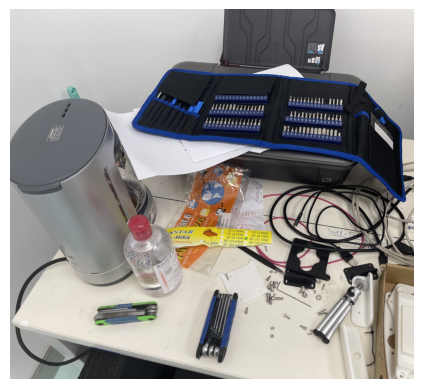

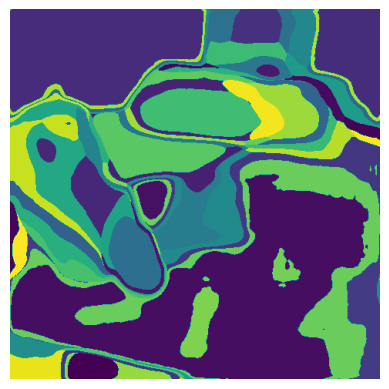

158
[(75, 446, 140, 479), (433, 139, 479, 169), (0, 249, 11, 342), (193, 70, 271, 79), (356, 86, 433, 146), (1, 214, 464, 479), (164, 223, 203, 272), (461, 306, 463, 310), (406, 415, 407, 415), (118, 250, 199, 369), (319, 72, 349, 87), (115, 135, 115, 135), (105, 136, 112, 141), (127, 178, 301, 237), (156, 89, 314, 170), (309, 120, 311, 123), (34, 167, 59, 198), (79, 190, 148, 296), (0, 0, 250, 133), (395, 0, 479, 140), (285, 0, 352, 44), (66, 443, 219, 479), (203, 166, 479, 339), (156, 219, 213, 285), (160, 236, 160, 236), (16, 291, 57, 336), (437, 292, 479, 479), (59, 333, 59, 333), (61, 336, 61, 336), (9, 339, 14, 344), (63, 339, 63, 339), (64, 341, 65, 342), (6, 345, 7, 346), (69, 346, 69, 346), (0, 348, 3, 365), (82, 351, 83, 351), (86, 352, 86, 352), (88, 353, 92, 353), (95, 354, 100, 354), (0, 414, 5, 421), (7, 422, 12, 424), (14, 425, 15, 425), (20, 426, 22, 426), (25, 426, 26, 426), (28, 427, 29, 427), (31, 428, 44, 431), (48, 432, 49, 432), (234, 478, 236, 479), (426, 479, 42

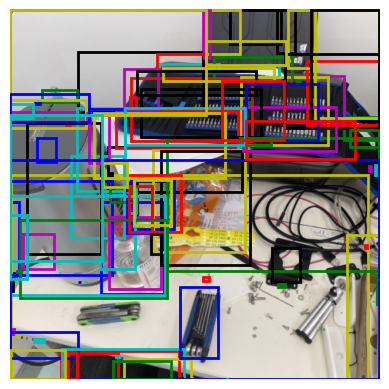

In [2]:
from PIL import Image
import random
image_path = "/home/fyp/Pictures/TestSeg/MessyTable.jpg"
import matplotlib.pyplot as plt

# 读取图像
image = Image.open(image_path)

# 显示图像
plt.imshow(image)
plt.axis('off')
plt.show()

feat_processor = LSegFeatImageProcessor()
clustered_map = feat_processor.get_clustered_map(image, num_clusters=50)
plt.imshow(clustered_map)
plt.axis('off')  # 关闭坐标轴
plt.show()
bounding_boxes = feat_processor.get_bounding_boxes(clustered_image=clustered_map)
print(len(bounding_boxes))
print(bounding_boxes)

npimage = np.array(feat_processor.current_image)
npimage = np.transpose(npimage, (1, 2, 0))
# 确保像素值在 [0, 1] 或 [0, 255] 范围内
if npimage.max() <= 1:
    npimage = (npimage * 255).astype(np.uint8)
else:
    npimage = npimage.astype(np.uint8)

import matplotlib.patches as patches

# 在聚类后的图像上绘制边界框
fig, ax = plt.subplots(1)
# ax.imshow(clustered_map)
ax.imshow(npimage)

# 定义颜色列表
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# 遍历每个边界框并在图像上绘制
for i, box in enumerate(bounding_boxes):
    # 随机选择颜色或按顺序选择颜色
    color = colors[i % len(colors)]
    # 假设边界框格式为 (x, y, width, height)
    x_min, y_min, x_max, y_max = box
    x = x_min
    y = y_min
    width = x_max - x_min
    # print(width)
    height = y_max - y_min
    # print(height)
    # 创建一个矩形补丁对象
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor=color, facecolor='none')
    # 将矩形补丁添加到图像上
    ax.add_patch(rect)

# 关闭坐标轴
plt.axis('off')
# 显示图像
plt.show()


In [23]:
cropped_images = feat_processor.get_cropped_images(bounding_boxes)
i = 18
new_image = cropped_images[i]
# 获取图像的尺寸
npimage = np.array(new_image)
print(npimage.shape)
# it's size is (3, 479, 133), cannot be displayed by plt
# 转换维度顺序，从 (C, H, W) 到 (H, W, C)
npimage = np.transpose(npimage, (1, 2, 0))
# 确保像素值在 [0, 1] 或 [0, 255] 范围内
if npimage.max() <= 1:
    npimage = (npimage * 255).astype(np.uint8)
else:
    npimage = npimage.astype(np.uint8)

# 获取图像的尺寸
height, width, _ = npimage.shape

# 打印图像的尺寸
print(f"Image size: {width}x{height}")

plt.imshow(npimage)
plt.axis('off')
plt.show()


IndexError: list index out of range